In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Load the Iris dataset
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


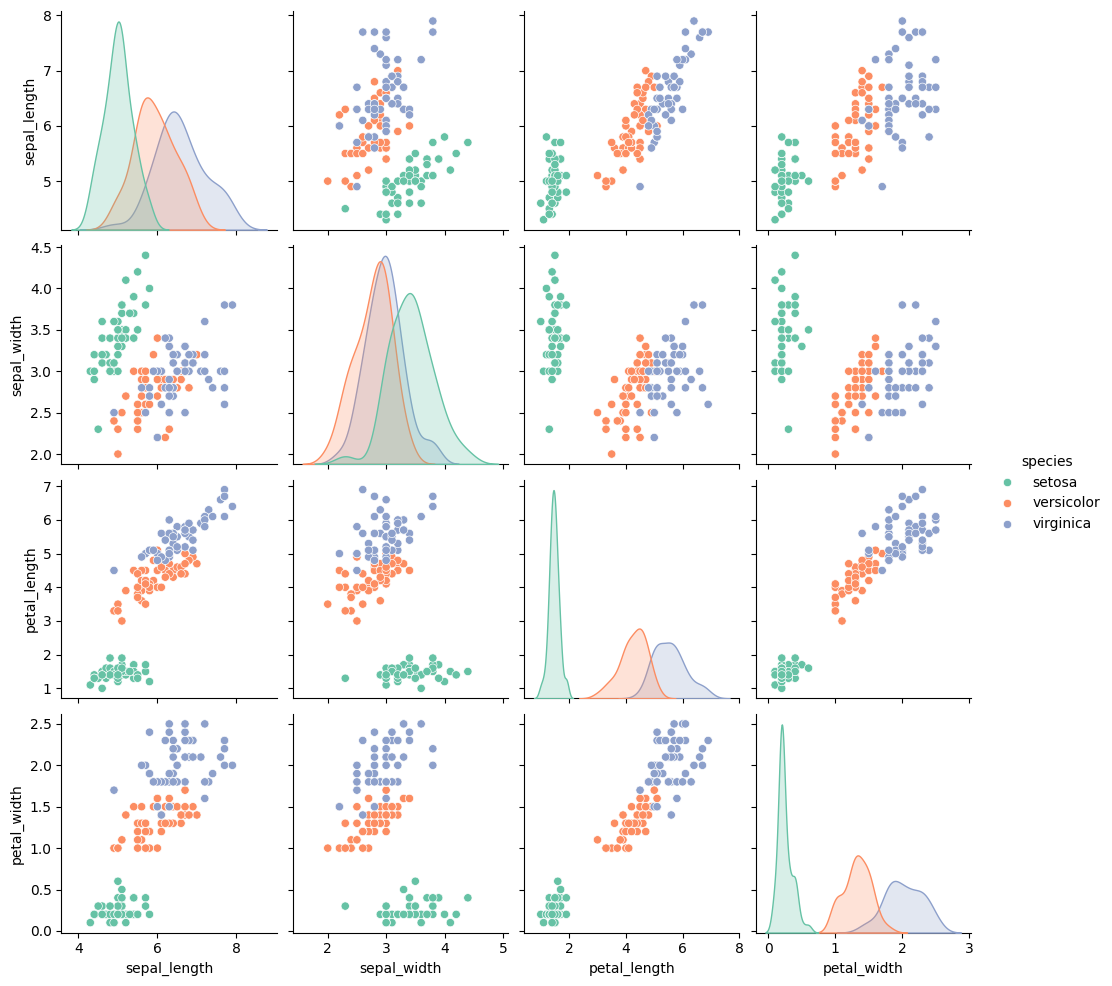

In [ ]:
# Create pairplots for data analysis
sns.pairplot(iris, hue='species', palette='Set2')
plt.show()

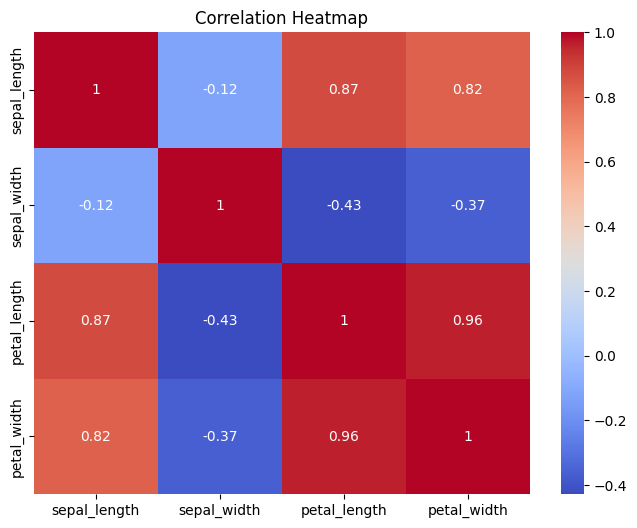

In [ ]:
# Select numerical columns for correlation heatmap
numerical_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_numerical = iris[numerical_columns]

# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris_numerical.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Create a boxplot for each species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.title('Sepal Length by Species')
plt.show()

In [ ]:
# Split the data into features (X) and target (y)
X = iris.drop('species', axis=1)
y = iris['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(max_depth=10, min_samples_leaf= 4, min_samples_split= 5, n_estimators= 50)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Save the model to a file using pickle
with open('iris_model.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

def grid_search_cv(X_train, y_train, models_params):

    results = {}

    for model, params in models_params.items():
        grid_search = GridSearchCV(model, params, cv=5)
        #cv=5: 5-fold cross-validation,dataset will be divided into 5 equal parts
        grid_search.fit(X_train, y_train)
        results[type(model).__name__] = {
            'best_estimator': grid_search.best_estimator_,
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_
        }

    return results



# Define models and their respective parameter grids
models_params = {
    LogisticRegression(): {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    },#Regularization: L1 (Lasso) and L2(Ridge)  to prevent overfitting
    #regularization strength C:Smaller values specify stronger regularization
    RandomForestClassifier(): {
        'n_estimators': [50, 100, 200],#number of trees in the forest
        'max_depth': [None, 10, 20, 30],#maximum depth of the tree
        #tree helps to control overfitting.
        #If set to None, the nodes are expanded until all leaves are pure or
        #until all leaves contain less than min_samples_split samples.
        'min_samples_split': [2, 5, 10],#minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4]#minimum number of samples required to be at a leaf node
    },
    DecisionTreeClassifier(): {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

results = grid_search_cv(X_train, y_train, models_params)

# Print results
for model, result in results.items():
    print(f"Model: {model}")
    print(f"Best parameters: {result['best_params']}")
    print(f"Best score: {result['best_score']}")
    print("\n")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Model: LogisticRegression
Best parameters: {'C': 1, 'penalty': 'l2'}
Best score: 0.9666666666666666


Model: RandomForestClassifier
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best score: 0.9666666666666666


Model: DecisionTreeClassifier
Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: 0.95




In [ ]:
import streamlit as st
import pickle
import numpy as np

# Load the trained model
with open('iris_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Create a dictionary to map species to images and names
species_info = {
    'setosa': {'image': 'setosa.jpg', 'name': 'Iris Setosa'},
    'versicolor': {'image': 'versicolor.jpg', 'name': 'Iris Versicolor'},
    'virginica': {'image': 'virginica.jpg', 'name': 'Iris Virginica'}
}

# Create a Streamlit app
st.title("Iris Flower Species Prediction")

# Input features from the user
sepal_length = st.slider("Sepal Length (cm)", 4.0, 8.0, 5.0)
sepal_width = st.slider("Sepal Width (cm)", 2.0, 4.5, 3.0)
petal_length = st.slider("Petal Length (cm)", 1.0, 7.0, 4.0)
petal_width = st.slider("Petal Width (cm)", 0.1, 2.5, 1.3)

# Predict the species
features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
prediction = model.predict(features)[0]

# Display the predicted species name and image
predicted_species_info = species_info.get(prediction, {})
if predicted_species_info:
    st.subheader("Predicted Species:")
    st.image(predicted_species_info['image'], caption=predicted_species_info['name'], use_column_width=True)
else:
    st.subheader("Predicted Species:")
    st.write("Invalid prediction")

# Display raw prediction label (for debugging)
st.write("Raw Prediction:", prediction)
